# cryoCARE odd-and_even registered
N2N (Noise2Noise) denoising del volumen empiar10311 usando cryoCARE. Utiliza 4 volúmenes:

1. $V_1$, con los planos Z pares ("even").
2. $V_2$, con los planos Z impares ("odd").
3. $V_3$, con los slices Z impares proyectados sobre los slices pares.
4. $V_4$, con los slices Z pares proyectados sobre los slices impares.

## Creamos $V_2$
El volumen "odd" proyectado. Para ello usamos los volúmenes even y odd ya generados previsamente en el experimento cryoCARE__even_odd.ipynb.

Projecting Slices:   0%|          | 0/54 [00:00<?, ?it/s]


Optical flow calculation and projection complete.


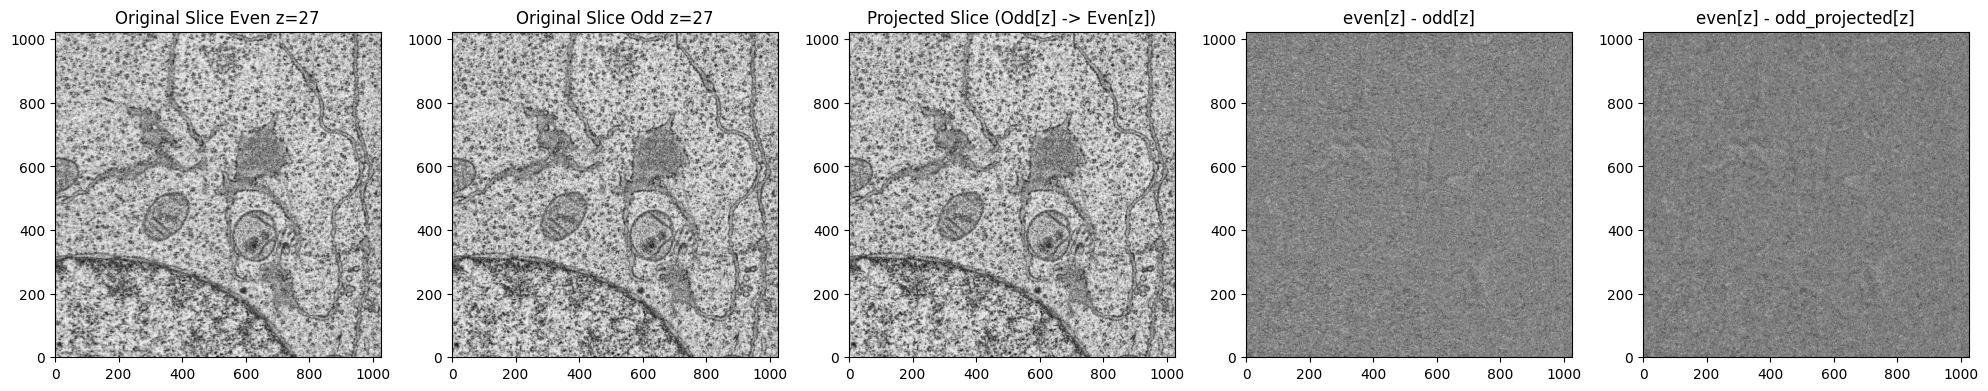

Writing odd_registered.mrc
done
-rw-r----- 1 jupyter-vruiz jupyter-vruiz 226493440 oct 29 22:38 odd_registered.mrc


Projecting Slices:   0%|          | 0/54 [00:00<?, ?it/s]


Optical flow calculation and projection complete.


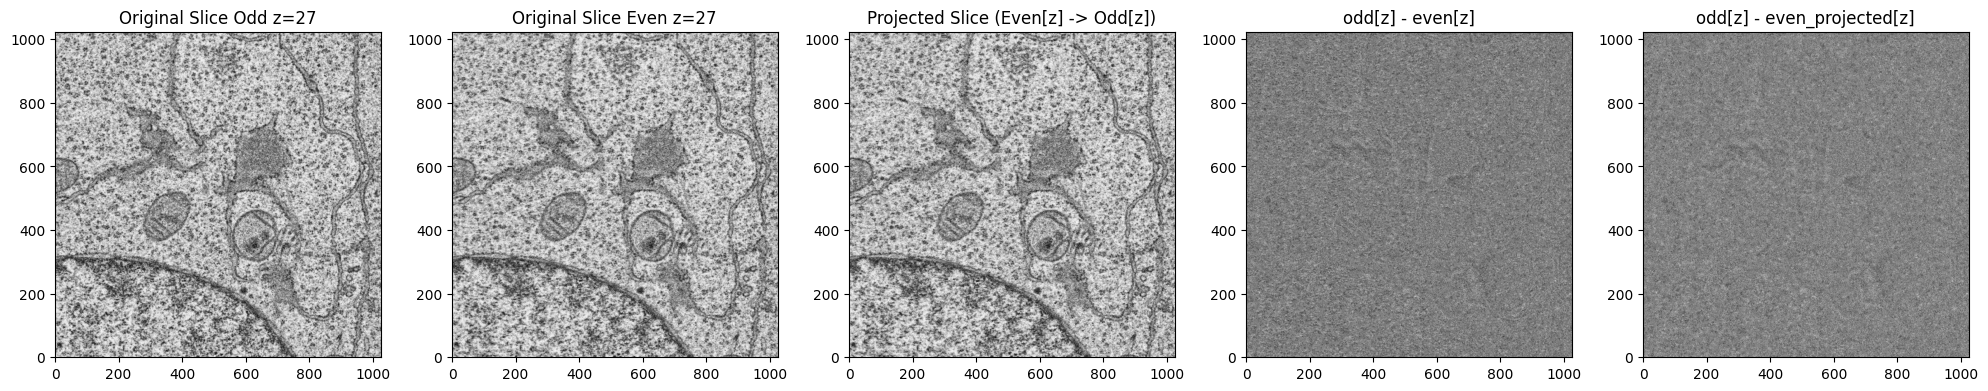

Writing even_registered.mrc
done
-rw-r----- 1 jupyter-vruiz jupyter-vruiz 226493440 oct 27 22:26 /nas/vruiz/cryoCARE/empiar10311/even_registered.mrc


In [1]:
%run project_odd_even_and_viceversa.ipynb

## Configuramos cryoCARE

In [2]:
%%writefile train_data_config__odd_even_registered.json
{
    "even": ["even_registered.mrc", "even.mrc"],
    "odd": ["odd.mrc", "odd_registered.mrc"],
    "mask": [""],
    "patch_shape": [16, 16, 16],
    "num_slices": 800,
    "split": 0.9,
    "tilt_axis": "Y",
    "n_normalization_samples": 200,
    "path": "./odd_even_registered_data",
    "overwrite": "True"  
}

Overwriting train_data_config__odd_even_registered.json


In [3]:
%%writefile train_data_config__odd_even_registered.json
{
    "even": ["even.mrc", "odd_registered.mrc"],
    "odd": ["even_registered.mrc", "odd.mrc"],
    "mask": [""],
    "patch_shape": [16, 16, 16],
    "num_slices": 800,
    "split": 0.9,
    "tilt_axis": "Y",
    "n_normalization_samples": 200,
    "path": "./odd_even_registered_data",
    "overwrite": "True"  
}

Overwriting train_data_config__odd_even_registered.json


In [4]:
%%bash
#cd /nas/vruiz/cryoCARE/empiar10311
source ~/envs/cryoCARE/bin/activate
cryoCARE_extract_train_data.py --conf train_data_config__odd_even_registered.json

2025-10-29 22:38:44.918640: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


even.data.shape=(54, 1024, 1024), sample_shape=[16, 16, 16]
even.data.shape=(54, 1024, 1024), sample_shape=[16, 16, 16]
Computing normalization parameters:


100%|██████████| 200/200 [00:00<00:00, 5361.78it/s]


## Entrenamos

In [5]:
%%writefile train_config__odd_even_registered.json
{
  "train_data": "./odd_even_registered_data",
  "epochs": 50,
  "steps_per_epoch": 200,
  "batch_size": 16,
  "unet_kern_size": 3,
  "unet_n_depth": 3,
  "unet_n_first": 16,
  "learning_rate": 0.0004,
  "model_name": "model",
  "path": "./",
  "gpu_id": [1]
}

Overwriting train_config__odd_even_registered.json


In [ ]:
%%bash
#cd /nas/vruiz/cryoCARE/empiar10311
source ~/envs/cryoCARE/bin/activate
cryoCARE_train.py --conf train_config__odd_even_registered.json

2025-10-29 22:38:50.571888: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-29 22:38:52.318010: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-29 22:38:52.319203: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-29 22:38:52.351093: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-29 22:38:52.353208: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-29 22:38:52.353353: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 1
GPU 1 successfully found
0 1
1 16
2 16
3 16
4 1
Epoch 1/50


2025-10-29 22:38:56.435429: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2025-10-29 22:38:57.838798: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2025-10-29 22:38:57.912686: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-10-29 22:38:58.811191: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2025-10-29 22:38:59.142577: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2025-10-29 22:39:28.287645: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:656] In AUTO-mode, and switching to DATA-based sharding, instead of FILE-based sharding 

200/200 [==============================] - 50s 90ms/step - loss: 0.5352 - mse: 0.5352 - mae: 0.5503 - val_loss: 0.4720 - val_mse: 0.4720 - val_mae: 0.5396
Epoch 2/50
200/200 [==============================] - 3s 13ms/step - loss: 0.4390 - mse: 0.4390 - mae: 0.5171 - val_loss: 0.4597 - val_mse: 0.4597 - val_mae: 0.5329
Epoch 3/50
200/200 [==============================] - 3s 13ms/step - loss: 0.4323 - mse: 0.4323 - mae: 0.5139 - val_loss: 0.4576 - val_mse: 0.4576 - val_mae: 0.5326
Epoch 4/50
200/200 [==============================] - 3s 13ms/step - loss: 0.4292 - mse: 0.4292 - mae: 0.5124 - val_loss: 0.4558 - val_mse: 0.4558 - val_mae: 0.5314
Epoch 5/50
200/200 [==============================] - 3s 13ms/step - loss: 0.4284 - mse: 0.4284 - mae: 0.5120 - val_loss: 0.4555 - val_mse: 0.4555 - val_mae: 0.5302
Epoch 6/50
200/200 [==============================] - 3s 13ms/step - loss: 0.4279 - mse: 0.4279 - mae: 0.5116 - val_loss: 0.4555 - val_mse: 0.4555 - val_mae: 0.5306
Epoch 7/50
200/200 [

## Inferimos

In [ ]:
%%bash
ln -sf /nas/vruiz/vols/empiar10311_stack_crop.mrc .

In [ ]:
%%writefile predict_config__odd_even_registered.json
{
    "path": "./model.tar.gz",
    "even": ["empiar10311_stack_crop.mrc"], 
    "odd": ["empiar10311_stack_crop.mrc"],
    "n_tiles": [1,1,1],
    "output": "odd_even_registered_denoised",
    "overwrite": "True",
    "gpu_id": [1]
}

In [ ]:
%%bash
#cd /nas/vruiz/cryoCARE/empiar10311
#pwd
source ~/envs/cryoCARE/bin/activate
cryoCARE_predict.py --conf predict_config__odd_even_registered.json || true

In [ ]:
import mrcfile
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def read_MRC(path_file):
    return mrcfile.read(mrc_file_path)

In [ ]:
mrc_file_path = 'empiar10311_stack_crop.mrc'
original_vol = read_MRC(mrc_file_path)

In [ ]:
mrc_file_path = 'odd_even_registered_denoised/empiar10311_stack_crop.mrc'
denoised_vol = read_MRC(mrc_file_path)

In [ ]:
# Choose a slice index in the middle of the volume for a good comparison
slice_idx = original_vol.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_vol[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_vol[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N-Odd-Even-Registered Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

In [ ]:
slice_idx = original_vol.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_vol[slice_idx, :256, :256].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_vol[slice_idx, :256, :256].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N-Odd-Even-Registered Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

In [ ]:
slice_idx = original_vol.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_vol[slice_idx, 500:1000, 1000:1500].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_vol[slice_idx, 500:1000, 1000:1500].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N-Odd-Even-Registered Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(16, 16))
slice_idx = denoised_vol.shape[0]//2
plt.imshow(denoised_vol[slice_idx, 200:600, 200:600], cmap="gray")

In [ ]:
figure(figsize=(16, 16))
slice_idx = original_vol.shape[0]//2
plt.imshow(original_vol[slice_idx, 200:600, 200:600], cmap="gray")